<a href="https://colab.research.google.com/github/vardanagarwal/crowd_counting/blob/master/SHT_Map_error_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 450kB 41.5MB/s 
     |████████████████████████████████| 3.8MB 41.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Creating training and testing csv files

In [0]:
import zipfile
zf = zipfile.ZipFile('/content/drive/My Drive/ShanghaiTech_Crowd_Counting_Dataset.zip', "r")
zf.extractall()

In [0]:
import h5py
import pandas as pd
from matplotlib import pyplot as plt
import scipy.io as io
import glob
from tqdm import tqdm
import os
import numpy as np
import cv2

In [16]:
part_A_train = 'part_A_final/train_data/ground_truth'
part_B_train = 'part_B_final/train_data/ground_truth'
path_sets = [part_A_train, part_B_train]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.mat')):
        img_paths.append(img_path)
print(len(img_paths))

700


In [19]:
df = []
for img_path in tqdm(img_paths):
    mat = io.loadmat(img_path)    
    real = mat["image_info"][0,0][0,0][1][0][0]
    file_path = img_path.replace('.mat','.h5').replace('ground_truth','ground').replace('GT_IMG', 'IMG')
    file_path = os.path.join('drive/My Drive/ShanghaiTech_h5', file_path) 
    gt_file = h5py.File(file_path,'r')
    groundtruth = np.asarray(gt_file['density'])
    img_4 = cv2.resize(groundtruth,(int(groundtruth.shape[1]/4),int(groundtruth.shape[0]/4)),interpolation = cv2.INTER_CUBIC)*16
    img_4 = np.expand_dims(img_4,axis  = 3)
    val_4 = np.sum(img_4)
    img_8 = cv2.resize(groundtruth,(int(groundtruth.shape[1]/8),int(groundtruth.shape[0]/8)),interpolation = cv2.INTER_CUBIC)*64
    img_8 = np.expand_dims(img_8,axis  = 3)
    val_8 = np.sum(img_8)
    got = np.sum(groundtruth)
    df.append((real, got, val_4, val_8))

  0%|          | 0/700 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  del sys.path[0]
100%|██████████| 700/700 [00:04<00:00, 163.74it/s]


In [0]:
train = pd.DataFrame(df, columns=('true', 'pred', 'pred_4', 'pred_8'))

In [21]:
part_A_test = 'part_A_final/test_data/ground_truth'
part_B_test = 'part_B_final/test_data/ground_truth'
path_sets = [part_A_test, part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.mat')):
        img_paths.append(img_path)
print(len(img_paths))

498


In [22]:
df = []
for img_path in tqdm(img_paths):
    mat = io.loadmat(img_path)    
    real = mat["image_info"][0,0][0,0][1][0][0]
    file_path = img_path.replace('.mat','.h5').replace('ground_truth','ground').replace('GT_IMG', 'IMG')
    file_path = os.path.join('drive/My Drive/ShanghaiTech_h5', file_path) 
    gt_file = h5py.File(file_path,'r')
    groundtruth = np.asarray(gt_file['density'])
    img_4 = cv2.resize(groundtruth,(int(groundtruth.shape[1]/4),int(groundtruth.shape[0]/4)),interpolation = cv2.INTER_CUBIC)*16
    img_4 = np.expand_dims(img_4,axis  = 3)
    val_4 = np.sum(img_4)
    img_8 = cv2.resize(groundtruth,(int(groundtruth.shape[1]/8),int(groundtruth.shape[0]/8)),interpolation = cv2.INTER_CUBIC)*64
    img_8 = np.expand_dims(img_8,axis  = 3)
    val_8 = np.sum(img_8)
    got = np.sum(groundtruth)
    df.append((real, got, val_4, val_8))

  0%|          | 0/498 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  del sys.path[0]
100%|██████████| 498/498 [00:03<00:00, 158.44it/s]


In [0]:
test = pd.DataFrame(df, columns=('true', 'pred', 'pred_4', 'pred_8'))

In [24]:
test

,true,pred,pred_4,pred_8
0,217,214.017273,212.627457,213.013611
1,823,818.894470,816.805542,822.699524
2,69,63.758347,63.785679,62.399315
3,391,383.926056,382.301575,381.371246
4,589,583.171265,583.183838,578.118530
...,...,...,...,...
493,133,128.662048,128.702957,128.761078
494,79,72.764900,72.796249,72.892891
495,301,297.621063,298.245728,299.538300
496,331,329.603851,332.410339,337.635498


In [0]:
train.to_csv('/content/drive/My Drive/train.csv', index=False)
test.to_csv('/content/drive/My Drive/test.csv', index=False)

# Performing regression on training and testing csv files

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train = train['pred'].values.reshape(-1, 1)
y_train = train['true']
X_test = test['pred'].values.reshape(-1, 1)
y_test = test['true']
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
before_reg_mae = mean_absolute_error(np.array(y_test), np.array(X_test))
after_reg_mae = mean_absolute_error(np.array(y_test), np.array(y_pred))
before_reg_mse = mean_squared_error(np.array(y_test), np.array(X_test), squared=False)
after_reg_mse = mean_squared_error(np.array(y_test), np.array(y_pred), squared=False)

In [77]:
print('MAE before regression =', before_reg_mae)
print('MAE after regression =', after_reg_mae)
print('MSE before regression =', before_reg_mse)
print('MSE after regression =', after_reg_mse)

MAE before regression = 4.297796846872353
MAE after regression = 1.8987950361959476
MSE before regression = 5.4365785363952535
MSE after regression = 3.2074225531052916


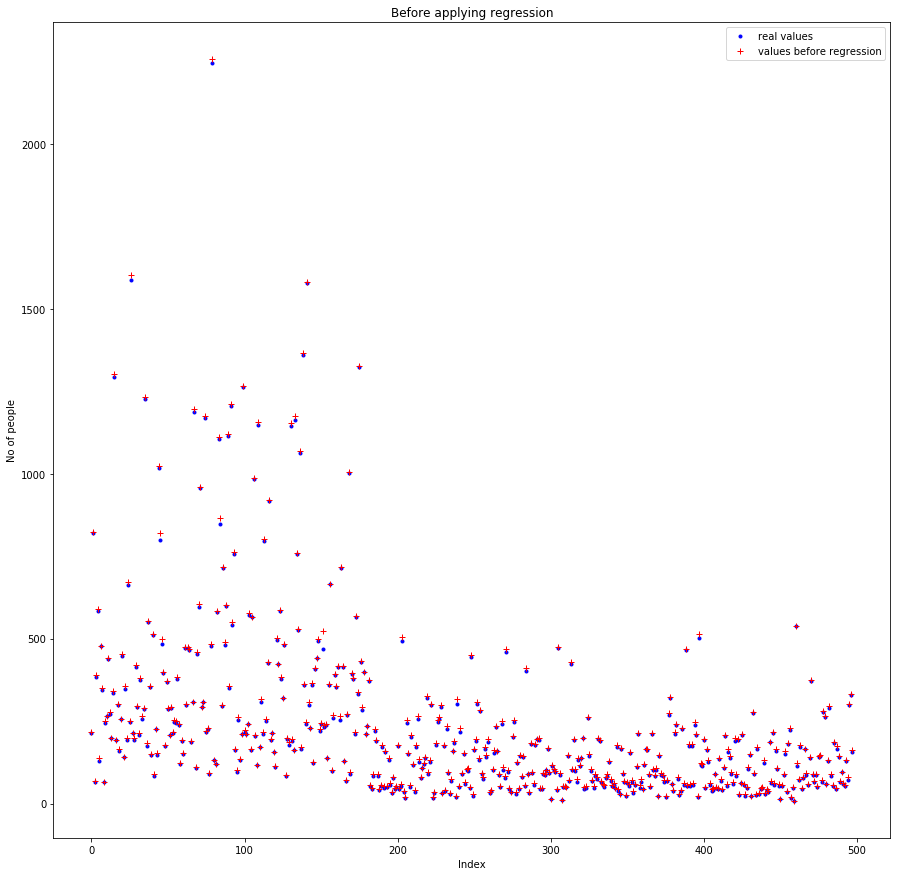

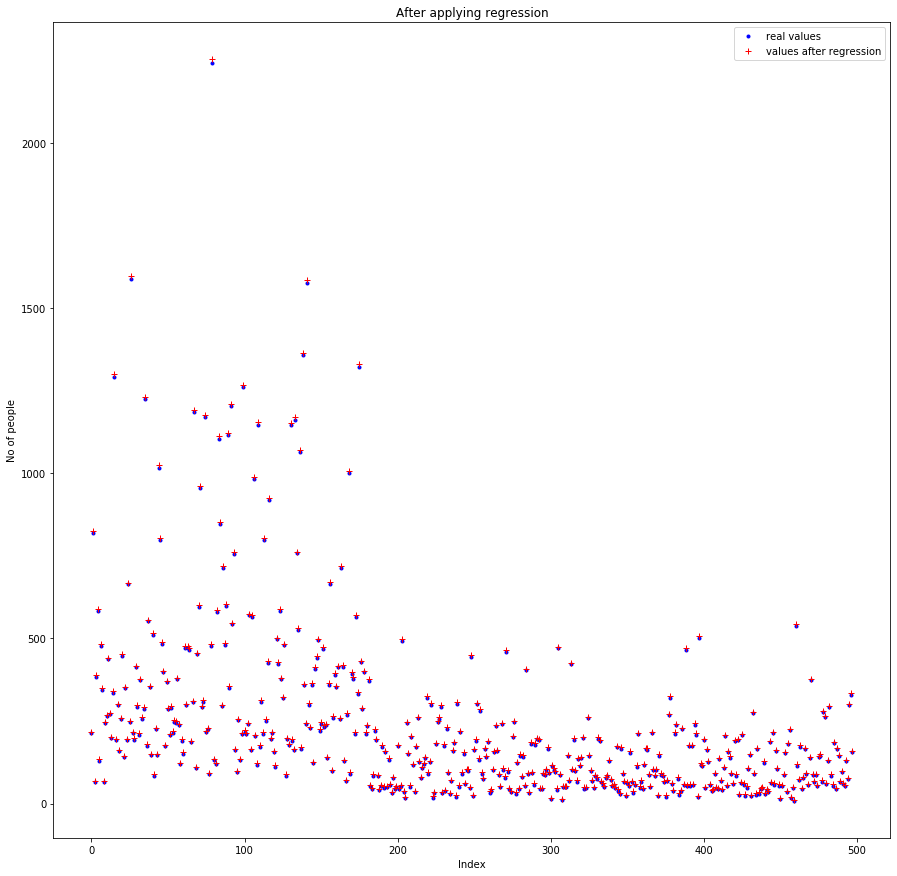

In [78]:
plt.figure(figsize=(15 ,15))
plt.plot(np.arange(len(X_test)), X_test, 'b.', label='real values')
plt.plot(np.arange(len(X_test)), y_test, 'r+', label='values before regression')
plt.legend()
plt.xlabel('Index')
plt.ylabel('No of people')
plt.title('Before applying regression')
plt.figure(figsize=(15 ,15))
plt.plot(np.arange(len(X_test)), X_test, 'b.', label='real values')
plt.plot(np.arange(len(X_test)), y_pred, 'r+', label='values after regression')
plt.legend()
plt.xlabel('Index')
plt.ylabel('No of people')
plt.title('After applying regression')
plt.show()

In [0]:
import pickle
Pkl_Filename = "drive/My Drive/regression.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)

In [0]:
Pkl_Filename = "drive/My Drive/regression.pkl"  
with open(Pkl_Filename, 'rb') as file:  
    regressor = pickle.load(file)

regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)